In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch as th

from cnn import CNN, createLossAndOptimizer
from torch.utils.data import DataLoader
from tqdm import tqdm

from imgdata import DefaultTrainSet

In [14]:
%matplotlib inline

if th.cuda.is_available():
  # Make CuDNN Determinist
  th.backends.cudnn.deterministic = True

# Define default device, we should use the GPU (cuda) if available
device = th.device("cuda" if th.cuda.is_available() else "cpu")
device

device(type='cpu')

### Set Constants
define learning rate as a list of values, and the number of epochs and batch size

In [15]:
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
batch_size = 16
num_epochs = 20

### Load data
using the DefaultTrainSet class from imgdata.py

In [16]:
train_set = DefaultTrainSet()

train_dataloader = th.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

### Define the training function

In [17]:
def train(net, batch, n_epochs, lr, train_loader):
    """
    Train a neural network and print statistics of the training

    :param train_loader: loader for the training data
    :param net: (PyTorch Neural Network)
    :param batch: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param lr: (float) learning rate used by the optimizer
    """
    print("---------- HYPERPARAMETERS ----------")
    print("batch_size=", batch)
    print("n_epochs=", n_epochs)
    print("learning_rate=", lr)
    print("-" * 40)
    _accuracies = []
    _losses = []
    criterion, optimizer = createLossAndOptimizer(net, lr)
    # Move model to gpu if possible
    net = net.to(device)
    for epoch_count, epoch in enumerate(range(n_epochs)):
        # Set the model to training mode
        net.train()
        # Initialize the variables to compute the average loss
        total_loss = 0.00
        total_correct = 0
        pbar = tqdm(train_loader, leave=False)
        # Iterate over the training set
        for i, data in enumerate(pbar):

            # Get the inputs
            inputs, labels = data['imNorm'], data['label']
            # Move them to the correct device
            inputs = inputs.to(device)
            labels = labels.to(device)
            net = net.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)
             # Calculate Loss: softmax --> cross entropy loss
            _loss = criterion(outputs, labels)

            _, preds = th.max(outputs, 1)

            # Getting gradients w.r.t. parameters
            _loss.backward()

            # Updating parameters
            optimizer.step()

            # Update the running variables
            total_loss += _loss.item()
            avg_loss = total_loss / (i + 1)
            total_correct += th.sum(preds == labels.data)
            pbar.set_description("Epoch: {}/{}".format(epoch_count + 1, n_epochs))
            pbar.set_postfix(avergae_loss=avg_loss, running_accuracy=th.sum(preds == labels).item() / float(labels.size(0)))
            # save the model
            model_name = f"Outputs/models/model_{num_epochs}_epochs_learning_rate_{lr}.pth"
            th.save(net.state_dict(), model_name)

        # Calculate the average loss and accuracy of the epoch
        _losses.append(total_loss / len(train_loader))
        _accuracies.append((total_correct / train_loader.sampler.num_samples).item())
        # print losses and accuracies in the last epoch
        if epoch_count == n_epochs - 1:
            print("---------- FINAL RESULTS ----------")
            print("Losses fot every epoch:", _losses)
            print("Average accuracy for each epoch: {}".format(_accuracies))
            print("-" * 40)
    return _losses, _accuracies

In [18]:
losses_list = []
accuracies_list = []
for learning_rate in learning_rates:
    cnn = CNN()
    print("Training with learning rate {}\n".format(learning_rate))
    loss, accu = train(cnn, batch_size, n_epochs=num_epochs, lr=learning_rate, train_loader=train_dataloader)
    losses_list.append(loss)
    accuracies_list.append(accu)
    print("-"*40)

Training with learning rate 0.01

---------- HYPERPARAMETERS ----------
batch_size= 16
n_epochs= 20
learning_rate= 0.01
----------------------------------------


---------- FINAL RESULTS ----------
Losses fot every epoch: [128.33909929882395, 36.320782314647325, 9.249999474395405, 3.966146822510795, 1.478660145562096, 0.612273870918825, 0.17529062271727983, 0.18584643809593662, 0.2717692210613501, 0.1289049238766296, 0.26894627403651067, 0.11560544680806627, 0.34108253487665313, 0.2500028801955962, 1.2904372732803453, 0.3623610659218528, 0.14184412344417296, 0.12761841587885378, 0.08742866688027542, 0.15153258999487465]
Average accuracy for each epoch: [0.38857144117355347, 0.6342856884002686, 0.7971428632736206, 0.8514285683631897, 0.9114285707473755, 0.9599999785423279, 0.977142870426178, 0.9685714244842529, 0.977142870426178, 0.9800000190734863, 0.9685714244842529, 0.9828571677207947, 0.9742857217788696, 0.977142870426178, 0.9200000166893005, 0.9485714435577393, 0.9828571677207947, 0.9828571677207947, 0.9885714054107666, 0.9828571677207947]
----------------------------------------
----------------------------------------
Training with learni

---------- FINAL RESULTS ----------
Losses fot every epoch: [16.046464827927675, 4.0143844864585185, 1.3268188732591542, 0.45214145248482135, 0.25654318577918195, 0.45590288190534134, 0.10362656530283361, 0.09546850150581644, 0.052458891633643194, 0.013484601596722066, 0.43491542951345896, 0.2013473421929145, 0.17256326395671417, 0.2741341560004829, 0.17023689964027902, 0.16168398041044052, 0.2243564119831686, 0.09008671336015019, 0.04196921225629327, 0.36742779202362447]
Average accuracy for each epoch: [0.41428571939468384, 0.7057142853736877, 0.8285714387893677, 0.9257143139839172, 0.9599999785423279, 0.9399999976158142, 0.977142870426178, 0.9742857217788696, 0.977142870426178, 0.9942857027053833, 0.9285714030265808, 0.9628571271896362, 0.9657142758369446, 0.9485714435577393, 0.9657142758369446, 0.9685714244842529, 0.9599999785423279, 0.9828571677207947, 0.9857142567634583, 0.954285740852356]
----------------------------------------
----------------------------------------
Training 

---------- FINAL RESULTS ----------
Losses fot every epoch: [1.1571560122750022, 0.3445082012225281, 0.2070326107469472, 0.07964201339266518, 0.05073107469996268, 0.024648395091803235, 0.020055293613536793, 0.01388049316169186, 0.012032098666002805, 0.009404133179817687, 0.009123350408944216, 0.007356405406343666, 0.00633263241880658, 0.006367102709852837, 0.005199137006208978, 0.005283311739648608, 0.004548063163052906, 0.003945183977273039, 0.0035783466248011046, 0.0032474197531965647]
Average accuracy for each epoch: [0.6228571534156799, 0.8828571438789368, 0.9200000166893005, 0.9942857027053833, 0.991428554058075, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
----------------------------------------
----------------------------------------
Training with learning rate 1e-05

---------- HYPERPARAMETERS ----------
batch_size= 16
n_epochs= 20
learning_rate= 1e-05
----------------------------------------


---------- FINAL RESULTS ----------
Losses fot every epoch: [1.4372974227775226, 0.9034827216105028, 0.6527766693722118, 0.5477532812140204, 0.46030212261460046, 0.39590852707624435, 0.3513673862273043, 0.31467091088945215, 0.27609226446260104, 0.24262492697347293, 0.21719275956804102, 0.19687137380242348, 0.18124162710525774, 0.16203999146819115, 0.14948530156504025, 0.13180428675629877, 0.12269676358185032, 0.1072397909381173, 0.10544893941418691, 0.09222370775585825]
Average accuracy for each epoch: [0.39142856001853943, 0.7514285445213318, 0.8114285469055176, 0.854285717010498, 0.8799999952316284, 0.8942857384681702, 0.9257143139839172, 0.9257143139839172, 0.9457142949104309, 0.9685714244842529, 0.9657142758369446, 0.9714285731315613, 0.9828571677207947, 0.9828571677207947, 0.9885714054107666, 0.991428554058075, 0.9885714054107666, 0.9942857027053833, 0.9942857027053833, 0.9942857027053833]
----------------------------------------
----------------------------------------


In [19]:
# plot the losses of training against the number of epochs
def plot_loss(_losses, lr):
    plt.figure(figsize=(10,5))
    for _i, _loss in enumerate(_losses):
        plt.plot(_loss, label="learning rate: {}".format(lr[_i]))
    plt.title("Loss vs. Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# plot the accuracy of training against the number of epochs
def plot_accuracy(_accuracies, lr):
    plt.figure(figsize=(10,5))
    for _i, _accu in enumerate(_accuracies):
        plt.plot(_accu, label="learning rate: {}".format(lr[_i]))
    plt.title("Accuracy vs. Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()

In [20]:
# save the losses and accuracies in a numpy file
train_history = {'loss': np.array(losses_list), 'accuracy': np.array(accuracies_list)}
np.save('Outputs/models/train_history.npy', train_history)

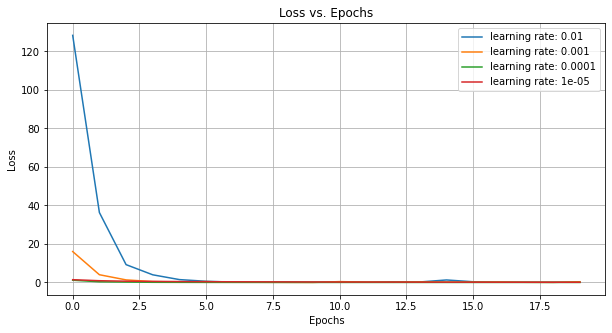

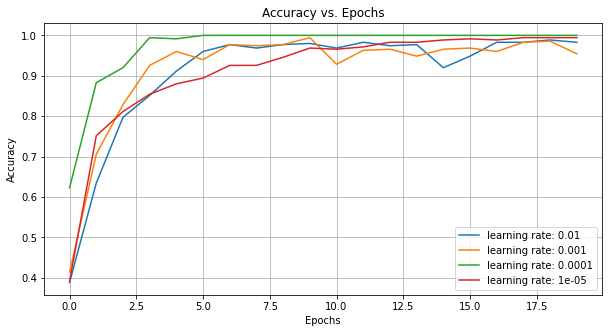

In [21]:
train_history = np.load('Outputs/models/train_history.npy', allow_pickle=True).item()
losses = train_history['loss']
accuracies = train_history['accuracy']

#plot the losses and accuracies
plot_loss(losses, learning_rates)
plot_accuracy(accuracies, learning_rates)